#K-Means Clustering (Unsupervised Learning)

In [1]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import pandas as pd

##Load dataset

In [2]:
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

##Convert to dataframe

In [5]:
df = pd.DataFrame(iris.data)
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


##Let's use two columns

In [6]:
df = df.drop([0,1],axis='columns')

In [7]:
df

,2,3
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


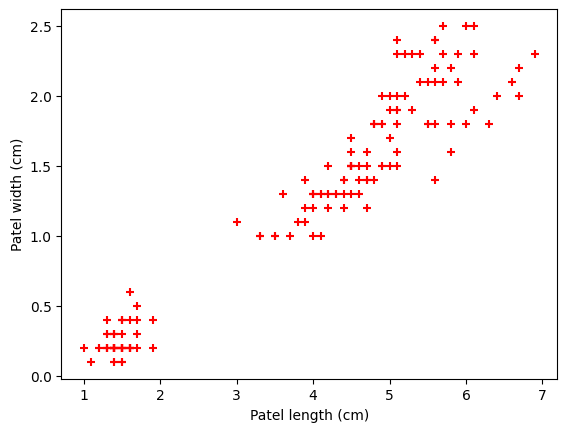

In [8]:
plt.scatter(df[2], df[3] , color = 'red', marker = '+')
plt.xlabel('Patel length (cm)')
plt.ylabel('Patel width (cm)')
plt.show()

## 🔬 Scale a Single Feature Using MinMaxScaler

In this step, we apply `MinMaxScaler` to scale a specific feature of the dataset.

### 🧮 Why MinMaxScaler?
- It scales values **between 0 and 1** (or a custom range).
- Useful for algorithms that are sensitive to feature magnitude (e.g., KMeans, SVM, Neural Networks).


In [9]:
s_length = MinMaxScaler()
s_length.fit(df[[2]])
df[2] = s_length.transform(df[[2]])

df

,2,3
0,0.067797,0.2
1,0.067797,0.2
2,0.050847,0.2
3,0.084746,0.2
4,0.067797,0.2
...,...,...
145,0.711864,2.3
146,0.677966,1.9
147,0.711864,2.0
148,0.745763,2.3


In [10]:
s_width = MinMaxScaler()
s_width.fit(df[[3]])
df[3] = s_width.transform(df[[3]])

df

,2,3
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


In [11]:
model = KMeans(n_clusters=2)
y_predicted = model.fit_predict(df[[2,3]])

y_predicted

C:\Users\Ali Computers\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Ali Computers\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Program Files\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Program Files\Python312\Lib\subprocess.py", line 1538

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [12]:
df['predicted'] = y_predicted

df

,2,3,predicted
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,0
146,0.677966,0.750000,0
147,0.711864,0.791667,0
148,0.745763,0.916667,0


In [13]:
df1 = df[df['predicted']==0]
df2 = df[df['predicted']==1]

print(df1)
print(df2)

            2         3  predicted
50   0.627119  0.541667          0
51   0.593220  0.583333          0
52   0.661017  0.583333          0
53   0.508475  0.500000          0
54   0.610169  0.583333          0
..        ...       ...        ...
145  0.711864  0.916667          0
146  0.677966  0.750000          0
147  0.711864  0.791667          0
148  0.745763  0.916667          0
149  0.694915  0.708333          0

[100 rows x 3 columns]
           2         3  predicted
0   0.067797  0.041667          1
1   0.067797  0.041667          1
2   0.050847  0.041667          1
3   0.084746  0.041667          1
4   0.067797  0.041667          1
5   0.118644  0.125000          1
6   0.067797  0.083333          1
7   0.084746  0.041667          1
8   0.067797  0.041667          1
9   0.084746  0.000000          1
10  0.084746  0.041667          1
11  0.101695  0.041667          1
12  0.067797  0.000000          1
13  0.016949  0.000000          1
14  0.033898  0.041667          1
15  0.084746

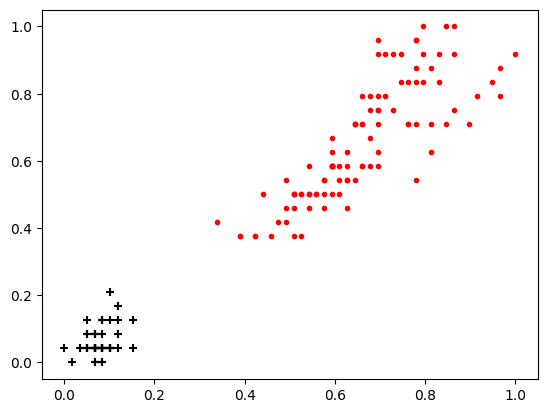

In [14]:
plt.scatter(df1[2], df1[3], color = 'red' , marker ='.')
plt.scatter(df2[2], df2[3], color = 'black' , marker ='+')
plt.show()

In [15]:
df = pd.DataFrame(iris.data)
df


,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
length = len(df.columns)
length

4

## 📉 Calculate SSE for Different Cluster Counts (Elbow Method)


In [17]:
sse =[]
for i in range(1,length+1):
    km = KMeans(n_clusters=i)
    km.fit(df)
    sse.append(km.inertia_)

print(sse)

[681.3706, 152.3479517603579, 78.8556658259773, 71.75951450992497]


## 🧠 What is the Elbow Method?

The **Elbow Method** is a popular technique used to determine the **optimal number of clusters (K)** for KMeans clustering.

### 📊 How It Works:
1. **KMeans** is applied to the data for a range of values of K (e.g., 1 to 10).
2. For each K, the **SSE (Sum of Squared Errors)** is computed, which represents the compactness of the clusters.
   - This is also called **inertia_** in scikit-learn's KMeans.
3. A line plot is made:  
   - **X-axis**: number of clusters (K)  
   - **Y-axis**: SSE value for each K

### 🎯 Interpretation:
- As the number of clusters increases, SSE naturally decreases.
- At some point, the **rate of decrease sharply slows down**—forming an “elbow” in the plot.
- The **K at this elbow point** is considered the optimal number of clusters because it balances **model complexity and clustering performance**.

The method helps avoid overfitting while achieving good grouping of the data.


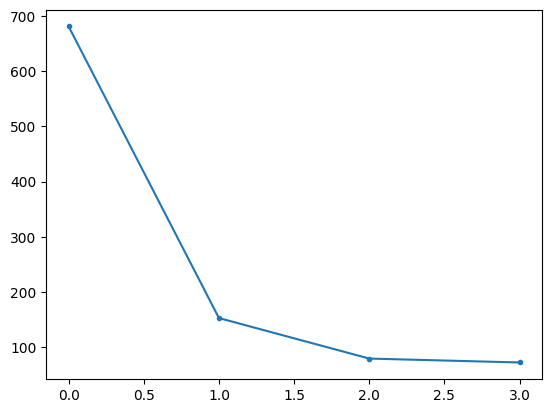

In [18]:
plt.plot(range(length),sse)
plt.scatter(range(length),sse, marker ='.')
plt.show()

##What did you identify from the elbow method? Use elbow method to identify the number of clusters and try applying K-Means on that number of clusters.

In [19]:
#Code here
model = KMeans(n_clusters=3)
y_predicted = model.fit_predict(df[[2,3]])

y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [22]:
df['predicted'] = y_predicted

df

,0,1,2,3,predicted
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [23]:
df1 = df[df['predicted']==0]
df2 = df[df['predicted']==1]
df3 = df[df['predicted']==2]

print(df1)
print(df2)
print(df3)

       0    1    2    3  predicted
50   7.0  3.2  4.7  1.4          0
51   6.4  3.2  4.5  1.5          0
52   6.9  3.1  4.9  1.5          0
53   5.5  2.3  4.0  1.3          0
54   6.5  2.8  4.6  1.5          0
55   5.7  2.8  4.5  1.3          0
56   6.3  3.3  4.7  1.6          0
57   4.9  2.4  3.3  1.0          0
58   6.6  2.9  4.6  1.3          0
59   5.2  2.7  3.9  1.4          0
60   5.0  2.0  3.5  1.0          0
61   5.9  3.0  4.2  1.5          0
62   6.0  2.2  4.0  1.0          0
63   6.1  2.9  4.7  1.4          0
64   5.6  2.9  3.6  1.3          0
65   6.7  3.1  4.4  1.4          0
66   5.6  3.0  4.5  1.5          0
67   5.8  2.7  4.1  1.0          0
68   6.2  2.2  4.5  1.5          0
69   5.6  2.5  3.9  1.1          0
70   5.9  3.2  4.8  1.8          0
71   6.1  2.8  4.0  1.3          0
72   6.3  2.5  4.9  1.5          0
73   6.1  2.8  4.7  1.2          0
74   6.4  2.9  4.3  1.3          0
75   6.6  3.0  4.4  1.4          0
76   6.8  2.8  4.8  1.4          0
78   6.0  2.9  4.5  

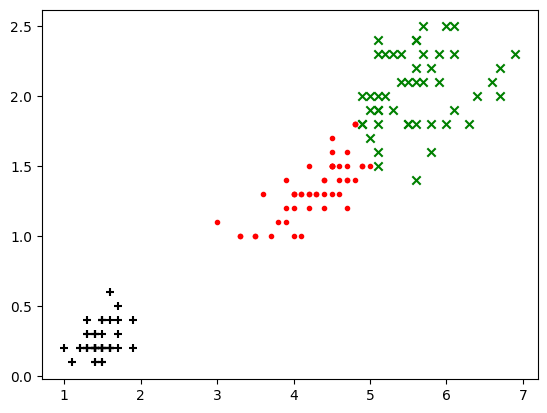

In [24]:
plt.scatter(df1[2], df1[3], color = 'red' , marker ='.')
plt.scatter(df2[2], df2[3], color = 'black' , marker ='+')
plt.scatter(df3[2], df3[3], color = 'green' , marker ='x')
plt.show()